In [1]:
#Andy Yang
#Aresty Research

#Importing all the Libraries
import h5py
import pandas as pd
import numpy as np
import os
from glob import glob
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline
from pathlib import Path
from datetime import datetime
from collections import namedtuple
import natsort
from natsort import index_natsorted, order_by_index
import tables
import jupyterthemes

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn import svm
from sklearn.svm import SVC

In [3]:
path = "/Address/Aresty Research Project/DATASETchallenge"
dir_list = os.listdir(path)            
print("Files and directories in '",path,"':")
print(dir_list) #List of all the .hdf5 files within a directory. 

Files and directories in ' /Users/andyy/Aresty Research Project/DATASETchallenge ':
['labels.txt', 'layer1.hdf5', 'layer10.hdf5', 'layer100.hdf5', 'layer101.hdf5', 'layer102.hdf5', 'layer103.hdf5', 'layer104.hdf5', 'layer105.hdf5', 'layer106.hdf5', 'layer107.hdf5', 'layer108.hdf5', 'layer109.hdf5', 'layer11.hdf5', 'layer110.hdf5', 'layer111.hdf5', 'layer112.hdf5', 'layer113.hdf5', 'layer114.hdf5', 'layer115.hdf5', 'layer116.hdf5', 'layer117.hdf5', 'layer118.hdf5', 'layer119.hdf5', 'layer12.hdf5', 'layer120.hdf5', 'layer121.hdf5', 'layer122.hdf5', 'layer123.hdf5', 'layer124.hdf5', 'layer125.hdf5', 'layer126.hdf5', 'layer127.hdf5', 'layer128.hdf5', 'layer129.hdf5', 'layer13.hdf5', 'layer130.hdf5', 'layer131.hdf5', 'layer132.hdf5', 'layer133.hdf5', 'layer134.hdf5', 'layer135.hdf5', 'layer136.hdf5', 'layer137.hdf5', 'layer138.hdf5', 'layer139.hdf5', 'layer14.hdf5', 'layer140.hdf5', 'layer141.hdf5', 'layer142.hdf5', 'layer143.hdf5', 'layer144.hdf5', 'layer145.hdf5', 'layer146.hdf5', 'layer1

In [4]:
File = namedtuple('File','name path size modified_date')

In [5]:
files = []

p = Path('/Users/andyy/Aresty Research Project/DATASETchallenge')

for item in p.glob('**/*'):
    if item.suffix in (['.hdf5']):
        name = item.name
        path = Path.resolve(item).parent
        size = item.stat().st_size
        modified = datetime.fromtimestamp(item.stat().st_mtime)
        files.append(File(name, path, size, modified))

In [6]:
d_x = []

for layer in p.glob('**/*'):
    
    if layer.suffix in (['.hdf5']):
        
        #print(layer)
        
        df = pd.DataFrame(np.array(h5py.File(layer, 'r')['OpenData']).transpose())
        
        x_mean = df[0].mean()
        
        d_x.append([layer,x_mean])
            
        #print(x_mean)
        
df1 = pd.DataFrame(data=d_x, columns=['file_name','mean value of x'])

df_x = pd.DataFrame(data = d_x, columns = ['file_location','mean value of x']) #Puts the means of the x_values into a Pandas DataFrame format. 
del df_x['file_location']

In [7]:
d_y = []

for layer in p.glob('**/*'):
    
    if layer.suffix in (['.hdf5']):
        
        #print(layer)
        
        df = pd.DataFrame(np.array(h5py.File(layer, 'r')['OpenData']).transpose())
        
        y_mean = df[1].mean()
        
        d_y.append([layer,y_mean])
            
        #print(x_mean)
        
df2 = pd.DataFrame(data=d_y, columns=['file_name','mean value of x'])

df_y = pd.DataFrame(data = d_y, columns = ['file_location','mean value of y']) #Puts the means of the x_values into a Pandas DataFrame format. 
del df_y['file_location']

In [8]:
d_a = []

for layer in p.glob('**/*'):
    
    if layer.suffix in (['.hdf5']):
        
        #print(layer)
        
        df = pd.DataFrame(np.array(h5py.File(layer, 'r')['OpenData']).transpose())
        
        a_mean = df[5].mean()
        
        d_a.append([layer,a_mean])
            
        #print(x_mean)
        
df3 = pd.DataFrame(data=d_a, columns=['file_name','mean value of Nominal Power'])

df_a = pd.DataFrame(data = d_a, columns = ['file_location','mean value of Laser Power Current']) #Puts the means of the x_values into a Pandas DataFrame format. 
del df_a['file_location']

In [9]:
d_b = []

for layer in p.glob('**/*'):
    
    if layer.suffix in (['.hdf5']):
        
        #print(layer)
        
        df = pd.DataFrame(np.array(h5py.File(layer, 'r')['OpenData']).transpose())
        
        b_mean = df[6].mean()
        
        d_b.append([layer,b_mean])
            
        #print(x_mean)
        
df4 = pd.DataFrame(data=d_b, columns=['file_name','mean value of Signal_in_a_GaAs'])

df_b = pd.DataFrame(data = d_b, columns = ['file_location','mean value of Signal_in_a_GaAs']) #Puts the means of the x_values into a Pandas DataFrame format. 
del df_b['file_location']

In [10]:
df_combined = pd.concat([df_x, df_y, df_a, df_b], axis=1, join='inner')
df_combined

,mean value of x,mean value of y,mean value of Laser Power Current,mean value of Signal_in_a_GaAs
0,-23.114784,-84.830269,4488.293945,1543.055908
1,-23.101221,-84.829369,4488.886230,1518.683350
2,-23.112848,-84.828369,4489.492188,1547.233643
3,-23.100641,-84.843018,4491.976074,1508.754517
4,-23.125904,-84.842278,4492.891602,1497.558228
...,...,...,...,...
374,-23.098812,-84.815605,4491.950684,1538.949707
375,-23.113535,-84.828545,4489.677734,1553.340698
376,-23.100891,-84.841385,4489.969238,1533.481934
377,-23.112759,-84.883942,4501.448242,1492.057373


In [11]:
d_anomaly = []

for layer in p.glob('**/*'):
    
    if layer.suffix in (['.hdf5']):

        df = pd.DataFrame(np.array(h5py.File(layer, 'r')['OpenData']).transpose())
        
        anomaly_mean = df[7].mean()
        
        d_anomaly.append([layer,anomaly_mean])
            
dfg = pd.DataFrame(data=d_anomaly, columns=['file_name','anomaly values for each layer'])
df_anom = pd.DataFrame(data = d_anomaly, columns = ['file_location','anomaly values']) #Puts the means of the x_values into a Pandas DataFrame format. 
del df_anom['file_location']

In [12]:
df_combined1 = pd.concat([df_x, df_y, df_a, df_b,df_anom], axis=1, join='inner')
df_combined1

,mean value of x,mean value of y,mean value of Laser Power Current,mean value of Signal_in_a_GaAs,anomaly values
0,-23.114784,-84.830269,4488.293945,1543.055908,1.0
1,-23.101221,-84.829369,4488.886230,1518.683350,1.0
2,-23.112848,-84.828369,4489.492188,1547.233643,1.0
3,-23.100641,-84.843018,4491.976074,1508.754517,1.0
4,-23.125904,-84.842278,4492.891602,1497.558228,1.0
...,...,...,...,...,...
374,-23.098812,-84.815605,4491.950684,1538.949707,0.0
375,-23.113535,-84.828545,4489.677734,1553.340698,1.0
376,-23.100891,-84.841385,4489.969238,1533.481934,1.0
377,-23.112759,-84.883942,4501.448242,1492.057373,1.0


In [13]:
anom_layers = df_combined1.loc[df_combined1["anomaly values"] != 0.00]
anom_layers

,mean value of x,mean value of y,mean value of Laser Power Current,mean value of Signal_in_a_GaAs,anomaly values
0,-23.114784,-84.830269,4488.293945,1543.055908,1.0
1,-23.101221,-84.829369,4488.886230,1518.683350,1.0
2,-23.112848,-84.828369,4489.492188,1547.233643,1.0
3,-23.100641,-84.843018,4491.976074,1508.754517,1.0
4,-23.125904,-84.842278,4492.891602,1497.558228,1.0
...,...,...,...,...,...
368,-23.112339,-84.828072,4492.467773,1516.663086,1.0
375,-23.113535,-84.828545,4489.677734,1553.340698,1.0
376,-23.100891,-84.841385,4489.969238,1533.481934,1.0
377,-23.112759,-84.883942,4501.448242,1492.057373,1.0


In [14]:
#Declaration of anomalous layers.
anom_x = anom_layers['mean value of x']
anom_y = anom_layers['mean value of y']
anom_LPC = anom_layers['mean value of Laser Power Current']
anom_SiG = anom_layers['mean value of Signal_in_a_GaAs']

In [15]:
non_anom_layers = df_combined1.loc[df_combined1["anomaly values"] == 0.00]
non_anom_layers

,mean value of x,mean value of y,mean value of Laser Power Current,mean value of Signal_in_a_GaAs,anomaly values
27,-23.100971,-84.824196,4442.912109,1437.151367,0.0
28,-23.110018,-84.830765,4434.267090,1438.219482,0.0
29,-23.107912,-84.834221,4438.639160,1476.585327,0.0
30,-23.130386,-84.832466,4442.383789,1439.515381,0.0
31,-23.124020,-84.834099,4493.467773,1589.192627,0.0
...,...,...,...,...,...
370,-23.106583,-84.860832,4447.829590,1421.932007,0.0
371,-23.103746,-84.845062,4434.379395,1464.820923,0.0
372,-23.101959,-84.834396,4496.041504,1557.574463,0.0
373,-23.099426,-84.828140,4489.551758,1575.594360,0.0


In [16]:
#Declaration of non-anomalous layers.
non_anom_x = non_anom_layers['mean value of x']
non_anom_y = non_anom_layers['mean value of y']
non_anom_LPC = non_anom_layers['mean value of Laser Power Current']
non_anom_SiG = non_anom_layers['mean value of Signal_in_a_GaAs']

C:\Users\andyy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


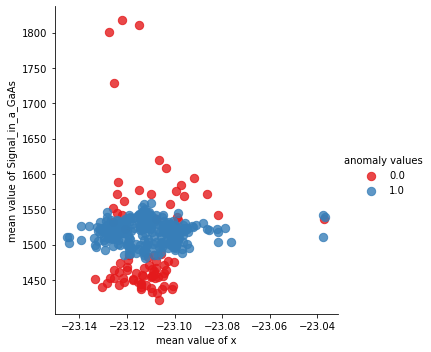

In [17]:
sns.lmplot('mean value of x', 'mean value of Signal_in_a_GaAs', data=df_combined1, hue='anomaly values', palette='Set1', fit_reg=False, scatter_kws={"s": 70});

In [38]:
# split dataset
X = df_combined1.iloc[:, 0:4]
y = df_combined1.iloc[:, 4]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

In [39]:
#Feature scaling
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [40]:
linear_model = SVC(kernel='sigmoid')
linear_model.fit(X_train,y_train)

SVC(kernel='sigmoid')

In [41]:
linear_model.score(X_test,y_test)

0.9078947368421053

In [42]:
# Predict the test set results
y_pred = linear_model.predict(X_test)
y_pred

array([0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 1.,
       1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 0., 1., 1., 1.])

In [43]:
cm = confusion_matrix(y_test, y_pred)
print (cm)
print("Precision Score : ",precision_score(y_test,y_pred, average ='micro'))
print("Recall Score :" , recall_score(y_test, y_pred, average = 'micro') )
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

[[14  6]
 [ 1 55]]
Precision Score :  0.9078947368421053
Recall Score : 0.9078947368421053


array([[14,  6],
       [ 1, 55]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

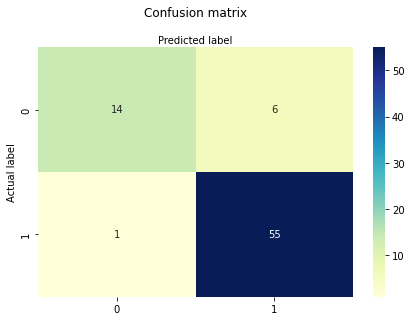

In [44]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')